hello!

question to analyze:
predict alcohol consumption based on religion

1. Inspect the datasets
2. Cleanup the data (reduce features, consolidate features, handle nans)
3. Analyze data distribution, trends, correlations
4. Build a regression model

In [12]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
print(glob.glob("*.csv"))

['OECD_Alcohol_Consumption_per_Capita.csv', 'relig_iso.csv', 'WRP_global_data.csv', 'WRP_national_data.csv']


In [3]:
OECD_Alcohol = pd.read_csv('OECD_Alcohol_Consumption_per_Capita.csv',encoding='utf-8')
#alcohol consumption throughout the years, throughout the countries
WRP_national = pd.read_csv('WRP_national_data.csv',encoding='utf-8')
#1995 values, religion over the years


## Inspecting datasets

### OECD_Alcohol

In [11]:
GPI_and_religion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   157 non-null    object 
 1   gdp_pc                    157 non-null    int64  
 2   gpi_rank                  157 non-null    int64  
 3   gpi_score                 157 non-null    float64
 4   percentage_non_religious  157 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 6.3+ KB


In [14]:
#checking if any countries are duplicated
print(GPI_and_religion.country.nunique())

157


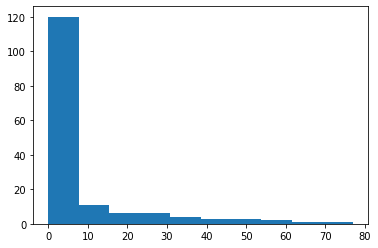

<function matplotlib.pyplot.clf()>

In [19]:
plt.hist(GPI_and_religion.percentage_non_religious)
plt.show()
plt.clf

In [6]:
OECD_Alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOCATION       2751 non-null   object 
 1   INDICATOR      2751 non-null   object 
 2   SUBJECT        2751 non-null   object 
 3   MEASURE        2751 non-null   object 
 4   FREQUENCY      2751 non-null   object 
 5   TIME           2751 non-null   int64  
 6   LITRES/CAPITA  2751 non-null   float64
 7   Flag Codes     216 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 172.1+ KB


In [10]:
OECD_countries = OECD_Alcohol.LOCATION.unique()
WRP_countries = WRP_national.name.unique()
common_countries = [i for i in OECD_countries if i in WRP_countries]
print(common_countries)

['AUS', 'BEL', 'CAN', 'CZE', 'FIN', 'GRC', 'HUN', 'ITA', 'JPN', 'LUX', 'MEX', 'NOR', 'POL', 'TUR', 'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'ISR', 'RUS', 'COL', 'ARG', 'PER']


In [8]:
WRP_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 84 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1995 non-null   int64  
 1   state         1995 non-null   int64  
 2   name          1995 non-null   object 
 3   chrstprot     1995 non-null   int64  
 4   chrstcat      1995 non-null   int64  
 5   chrstorth     1995 non-null   int64  
 6   chrstang      1995 non-null   int64  
 7   chrstothr     1995 non-null   int64  
 8   chrstgen      1995 non-null   int64  
 9   judorth       1995 non-null   int64  
 10  jdcons        1995 non-null   int64  
 11  judref        1993 non-null   float64
 12  judothr       1995 non-null   int64  
 13  judgen        1995 non-null   int64  
 14  islmsun       1995 non-null   int64  
 15  islmshi       1995 non-null   int64  
 16  islmibd       1995 non-null   int64  
 17  islmnat       1995 non-null   int64  
 18  islmalw       1995 non-null 

array(['USA', 'CAN', 'BHM', 'CUB', 'HAI', 'DOM', 'JAM', 'TRI', 'BAR',
       'DMA', 'GRN', 'SLU', 'SVG', 'AAB', 'SKN', 'MEX', 'BLZ', 'GUA',
       'HON', 'SAL', 'NIC', 'COS', 'PAN', 'COL', 'VEN', 'GUY', 'SUR',
       'ECU', 'PER', 'BRA', 'BOL', 'PAR', 'CHL', 'ARG', 'URU', 'UKG',
       'IRE', 'NTH', 'BEL', 'LUX', 'FRN', 'MNC', 'LIE', 'SWZ', 'SPN',
       'AND', 'POR', 'GMY', 'GFR', 'GDR', 'POL', 'AUS', 'HUN', 'CZE',
       'CZR', 'SLO', 'ITA', 'SNM', 'MLT', 'ALB', 'MNG', 'MAC', 'CRO',
       'YUG', 'BOS', 'KOS', 'SLV', 'GRC', 'CYP', 'BUL', 'MLD', 'ROM',
       'RUS', 'EST', 'LAT', 'LIT', 'UKR', 'BLR', 'ARM', 'GRG', 'AZE',
       'FIN', 'SWD', 'NOR', 'DEN', 'ICE', 'CAP', 'STP', 'GNB', 'EQG',
       'GAM', 'MLI', 'SEN', 'BEN', 'MAA', 'NIR', 'CDI', 'GUI', 'BFO',
       'LBR', 'SIE', 'GHA', 'TOG', 'CAO', 'NIG', 'GAB', 'CEN', 'CHA',
       'CON', 'DRC', 'UGA', 'KEN', 'TAZ', 'BUI', 'RWA', 'SOM', 'DJI',
       'ETH', 'ERI', 'ANG', 'MZM', 'ZAM', 'ZIM', 'MAW', 'SAF', 'NAM',
       'LES', 'BOT',